# IMPORTS

In [137]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import ConfusionMatrixDisplay,f1_score

rs=43

# DATA ESPLORATION
1. Load the data file and explore the data, showing size, data descriptions, data distributions with boxplot, pairplots


In [138]:
names= ['Index','Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
df=pd.read_csv('./09-01-23.csv',names=names)


In [139]:
df.head()

,Index,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,M,0.455,0.365,0.095,0.514,0.2245,0.1010,0.150,2.0
1,1,M,0.350,0.265,0.090,NaN,0.0995,0.0485,0.070,0.0
2,2,F,0.530,0.420,0.135,NaN,0.2565,0.1415,0.210,1.0
3,3,M,0.440,0.365,0.125,0.516,0.2155,0.1140,0.155,1.0
4,4,I,0.330,0.255,0.080,0.205,0.0895,0.0395,0.055,0.0


In [140]:
df.describe()

,Index,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,3997.000000,3976.000000,3987.000000,3990.000000,3983.000000,4002.000000,3990.000000,4177.000000
mean,2088.000000,0.525330,0.408448,0.139669,0.830577,0.360681,0.180995,0.239796,0.861623
std,1205.940366,0.119569,0.098728,0.041988,0.490629,0.221100,0.109425,0.139765,0.762510
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,0.000000
25%,1044.000000,0.450000,0.350000,0.115000,0.444500,0.188000,0.094000,0.130000,0.000000
50%,2088.000000,0.545000,0.425000,0.140000,0.802250,0.339000,0.171500,0.235000,1.000000
75%,3132.000000,0.615000,0.480000,0.165000,1.154375,0.503250,0.253500,0.330000,1.000000
max,4176.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,3.000000


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           4177 non-null   int64  
 1   Sex             4177 non-null   object 
 2   Length          3997 non-null   float64
 3   Diameter        3976 non-null   float64
 4   Height          3987 non-null   float64
 5   Whole weight    3990 non-null   float64
 6   Shucked weight  3983 non-null   float64
 7   Viscera weight  4002 non-null   float64
 8   Shell weight    3990 non-null   float64
 9   Rings           4177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB


array([[<Axes: title={'center': 'Index'}>,
        <Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>],
       [<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Whole weight'}>,
        <Axes: title={'center': 'Shucked weight'}>],
       [<Axes: title={'center': 'Viscera weight'}>,
        <Axes: title={'center': 'Shell weight'}>,
        <Axes: title={'center': 'Rings'}>]], dtype=object)

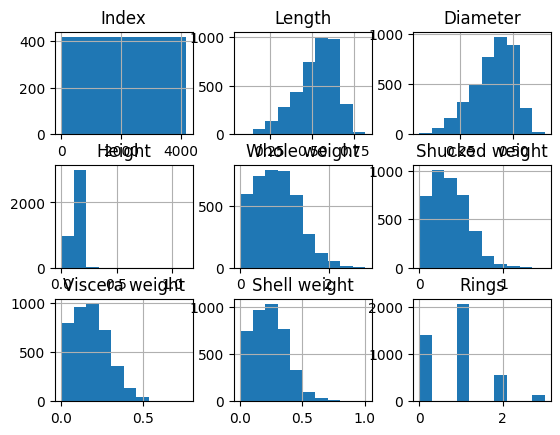

In [142]:
df.hist()

2. Comment the exploration of step 1 pointing out if there are imbalanced distributions, outliers, missing values

there are some unbalanced distributions in the attributes

- Height
- rings

there are also some missing values

# PREPROCESING
3. Drop the columns that are not relevant for the classification operation, if any, and explain why you do that. Deal with missing values, if any

In [143]:
## dropping index colum cause it's not useful to model selection
df.drop(inplace=True, columns='Index')

## converting some columns
df['Sex']=df['Sex'].astype(bool)
## removing missing values
df.dropna(inplace=True)
print("the size of the new dataset is {}".format(df.shape))

the size of the new dataset is (3052, 9)


# MODEL SELECTION
4. find the best classification scheme considering two classification methods, find the best hyperparameters using cross validation; the optimization must be focused on the f1_macro measure

In [144]:
# splitting dataset
target='Rings'
X=df.drop(columns=target)
y=df[target]

X_train,X_test,y_train,y_test=train_test_split(X,y)

In [145]:
# defining data structures
score='f1_macro'
model_names=['dt','lp']
models={
    'dt':{
        'name':'Decision tree',
        'estimator':DecisionTreeClassifier(random_state=rs),
        'parameters': [{'max_depth':range(1,20,1),'class_weight':[None,'balanced' ]}]
    },
    'lp':{
        'name':'Linear perceptron',
        'estimator':Perceptron(random_state=rs),
        'parameters': [{'early_stopping':[True,False],'class_weight':[None,'balanced' ]}]
    }
}
gscvs=[]
results=pd.DataFrame(columns=['model_name','best_estimator','best_params','f1_macro'])

In [146]:
for model in model_names:
    gs= GridSearchCV(models[model]['estimator'],models[model]['parameters'],scoring=score)
    gs.fit(X_train,y_train)
    
    gscvs.append(gs)
    results.loc[len(results)]=[
        model,
        gs.best_estimator_,
        gs.best_params_,
        f1_score(y_test,gs.predict(X_test),average='micro')

    ]
best_estimator=results.f1_macro.idxmax()
print(results.loc[best_estimator])

model_name                                                       dt
best_estimator    DecisionTreeClassifier(max_depth=10, random_st...
best_params                 {'class_weight': None, 'max_depth': 10}
f1_macro                                                   0.612058
Name: 0, dtype: object


# SHOW RESULTS
5. Show the performance measures and the confusion matrices for the best hyperparameters of each model

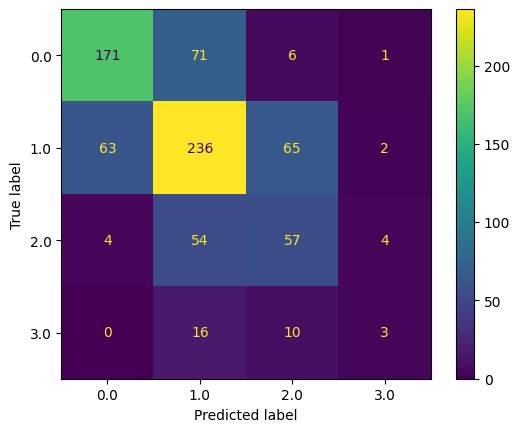

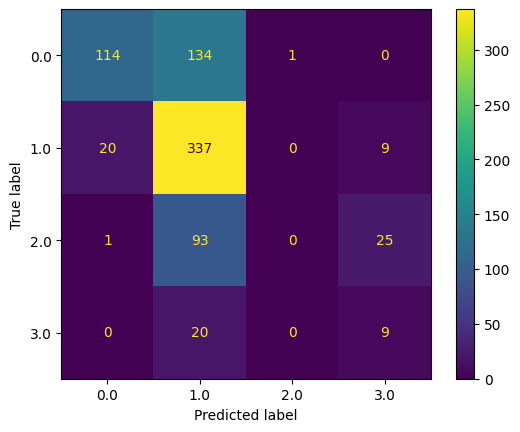

In [147]:
for gs in gscvs:
    ConfusionMatrixDisplay.from_estimator(gs,X_test,y_test)
    

6. Comment the results

models seems to be more capable for certain values of the target, one of the causes can be the lack of rappresetation of certain classes in the dataset as shown from the histogram